## Exploratory Data Analysis (Grouped Ratings)

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
%matplotlib inline 

### Feature Selection

In [4]:
grouped_clf_data = pd.read_csv('../data/grouped_ratings.csv', 
                               usecols=['rating','cleaned_review'])

grouped_clf_data.head()

,rating,cleaned_review
0,Fair,helps keep attention class seems make keep gri...
1,Great,medicine amazing used always last one turn tes...
2,Poor,hyper focused dry mouth straterra put state ma...
3,Great,adhd taking adderall years take morning someti...
4,Great,keeps focused however wears sleep till hours l...


### Data Types

In [5]:
grouped_clf_data.dtypes

rating            object
cleaned_review    object
dtype: object

### Checking for Any Null Values

In [6]:
print(grouped_clf_data.isnull().sum())

rating             0
cleaned_review    21
dtype: int64


### Dropping Rows with Null Reviews

In [7]:
grouped_clf_data = grouped_clf_data.dropna()

### Categorical Description

In [8]:
grouped_rating_data = grouped_clf_data['rating']

grouped_rating_data.describe()

count     215010
unique         3
top        Great
freq      129720
Name: rating, dtype: object

In [9]:
grouped_rating_data.value_counts()

Great    129720
Poor      53566
Fair      31724
Name: rating, dtype: int64

### Data Visualization

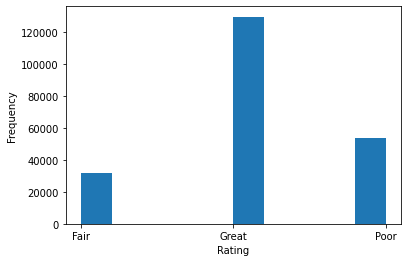

In [10]:
plt.hist(grouped_rating_data)

plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

### Text Classification Models without Sampling

#### Linear SVM (Stochastic Gradient Descent) 

In [11]:
x = grouped_clf_data['cleaned_review']
y = grouped_clf_data['rating']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=0)

In [12]:
# Classification Pipeline
sgd_clf_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3,
                                       random_state=42, max_iter=5, tol=None)),
               ])

In [13]:
# Fitting + Prediction
sgd_clf_pipeline.fit(x_train.values, y_train)
sgd_prediction = sgd_clf_pipeline.predict(x_test.values)

In [14]:
# Accuracy + Classification Report
print('===============Stochastic Gradient Descent===============')
print(classification_report(y_test, sgd_prediction,zero_division=0))

===============Stochastic Gradient Descent===============
              precision    recall  f1-score   support

        Fair       0.00      0.00      0.00      9597
       Great       0.62      1.00      0.77     39029
        Poor       0.87      0.10      0.17     15877

    accuracy                           0.63     64503
   macro avg       0.50      0.37      0.31     64503
weighted avg       0.59      0.63      0.51     64503



#### Naive Bayes

In [15]:
# Bernoulli Naive Bayes Classifier
bern_clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', BernoulliNB()),
               ])

# Fitting + Prediction
bern_clf.fit(x_train.values.astype('U'),y_train)
bern_prediction = bern_clf.predict(x_test.values.astype('U'))

# Accuracy + Classification Report
print('================= Bernoulli Naive Bayes =================')
print(classification_report(y_test,bern_prediction))

================= Bernoulli Naive Bayes =================
              precision    recall  f1-score   support

        Fair       0.37      0.30      0.33      9597
       Great       0.80      0.83      0.81     39029
        Poor       0.66      0.67      0.66     15877

    accuracy                           0.71     64503
   macro avg       0.61      0.60      0.60     64503
weighted avg       0.70      0.71      0.70     64503



### Text Classification Models with Sampling (No Replacement)

#### Drawing Random Samples

In [16]:
import random 
# Drawing a sample of 20,000 from each group

poor_sample = grouped_clf_data.loc[grouped_clf_data['rating'] == 'Poor']
fair_sample = grouped_clf_data.loc[grouped_clf_data['rating'] == 'Fair']
great_sample = grouped_clf_data.loc[grouped_clf_data['rating'] == 'Great']

In [21]:
poor_sample = poor_sample.sample(n = 20_000, replace=False, random_state=1)
poor_sample.head()

,rating,cleaned_review
152400,Poor,yeah well ended end road xolair daughter treat...
6156,Poor,using product weeks mild acne forehead cheeks ...
179880,Poor,worse birth control ever started taking orsyth...
36103,Poor,aviane made feel excessively fatigued still go...
35472,Poor,using nuvaring almost year noticed months ago ...


In [20]:
fair_sample = fair_sample.sample(n = 20_000, replace=False, random_state=1)
fair_sample.head()

,rating,cleaned_review
208866,Fair,far med feeling terrible akasthia take night i...
94248,Fair,guess working great relieve possibility clots ...
82034,Fair,loved invokanamet went blood sugars never went...
124459,Fair,severely injured snapped mental pt state hospi...
110040,Fair,dysmenorrhea overweight medication short time ...


In [22]:
great_sample = great_sample.sample(n = 20_000, replace=False, random_state=1)
great_sample.head()

,rating,cleaned_review
192124,Great,honestly say far stribild saved june counts vi...
45804,Great,love love love six months adore totally protec...
6032,Great,struggled chin acne adult life pretty much tri...
108609,Great,remeron years helped much depression although ...
209864,Great,smoked years started bupropion took mg days to...


In [26]:
project_sample =  pd.concat([poor_sample,fair_sample,great_sample])

project_sample.head()

,rating,cleaned_review
152400,Poor,yeah well ended end road xolair daughter treat...
6156,Poor,using product weeks mild acne forehead cheeks ...
179880,Poor,worse birth control ever started taking orsyth...
36103,Poor,aviane made feel excessively fatigued still go...
35472,Poor,using nuvaring almost year noticed months ago ...


#### Linear SVM (Stochastic Gradient Descent) 

In [27]:
X = project_sample['cleaned_review']
Y = project_sample['rating']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.30, random_state=0)

In [28]:
# Classification Pipeline
sgd_clf_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [29]:
# Fitting + Prediction
sgd_clf_pipeline.fit(x_train.values.astype('U'), y_train)
sgd_prediction = sgd_clf_pipeline.predict(x_test.values.astype('U'))

In [30]:
# Accuracy + Classification Report
print('===============Stochastic Gradient Descent===============')
print(classification_report(y_test, sgd_prediction))

===============Stochastic Gradient Descent===============
              precision    recall  f1-score   support

        Fair       0.63      0.21      0.32      6004
       Great       0.59      0.78      0.67      6028
        Poor       0.59      0.79      0.68      5968

    accuracy                           0.60     18000
   macro avg       0.61      0.60      0.56     18000
weighted avg       0.61      0.60      0.56     18000



#### Naive Bayes

In [31]:
# Bernoulli Naive Bayes Classifier
bern_clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', BernoulliNB()),
               ])

# Fitting + Prediction
bern_clf.fit(x_train.values.astype('U'),y_train)
bern_prediction = bern_clf.predict(x_test.values.astype('U'))

# Accuracy + Classification Report
print('================= Bernoulli Naive Bayes =================')
print(classification_report(y_test,bern_prediction))

================= Bernoulli Naive Bayes =================
              precision    recall  f1-score   support

        Fair       0.55      0.50      0.52      6004
       Great       0.64      0.65      0.65      6028
        Poor       0.63      0.69      0.66      5968

    accuracy                           0.61     18000
   macro avg       0.61      0.61      0.61     18000
weighted avg       0.61      0.61      0.61     18000

